# Exploratory Data Analysis

In [1]:
import pandas as pd
resume_data = pd.read_excel("extracted_details.xlsx")
resume_data.shape

(79, 7)

In [3]:
resume_data.head()

,Employee_Name,Category,Education,Skills,Professional_Experience,Companies_Worked,Years_of_Experience
0,Anubhavsingh,PeopleSoft Resumes,"['B.Tech', 'Engineering']","{'Programming Languages': ['C', 'R'], 'Databas...","PeopleSoft Administration, PeopleSoft FSCM","HCL, PeopleSoft, IBM",NaN
1,G Ananda Rayudu,PeopleSoft Resumes,['Bachelors'],"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft DBA,"IDC Technologies Sol. (I) Pvt. Ltd., Texas Dep...",7.00
2,Gangareddy,PeopleSoft Resumes,[],"{'Programming Languages': ['C', 'SQL', 'R'], '...","PeopleSoft Administrator, PeopleSoft FSCM",PeopleSoft,4.00
3,Murali,PeopleSoft Resumes,[],"{'Programming Languages': ['C', 'C++', 'SQL', ...","PeopleSoft Administration, PeopleSoft Administ...","L N T INFOTECH, Regency Technologies, DXC Tech...",6.00
4,Priyanka Ramadoss,PeopleSoft Resumes,"['Engineering', 'B.E']","{'Programming Languages': ['C', 'SQL', 'R'], '...","SQL Developer, PeopleSoft Administration, Peop...","Accenture Solutions Pvt Ltd., Accenture, Peopl...",4.11


In [5]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_Name            79 non-null     object 
 1   Category                 79 non-null     object 
 2   Education                79 non-null     object 
 3   Skills                   79 non-null     object 
 4   Professional_Experience  79 non-null     object 
 5   Companies_Worked         79 non-null     object 
 6   Years_of_Experience      71 non-null     float64
dtypes: float64(1), object(6)
memory usage: 4.4+ KB


In [7]:
resume_data.isnull().sum()

Employee_Name              0
Category                   0
Education                  0
Skills                     0
Professional_Experience    0
Companies_Worked           0
Years_of_Experience        8
dtype: int64

# Handling Missing Values

In [9]:
import os
import re
import textract
import pandas as pd
import nltk
import spacy

In [11]:
def categorize_education(education):
    bachelors_keywords = [
        "B.Tech", "B-Tech", "BTECH", "B.Tech", "B. Tech", "Engineering", "B.E", "B.Sc", "Bsc",
        "B.Sc", "BSC", "B.A", "BCA", "B.C.A", "Bachelor of Technology", "BACHELOR OF TECHNOLOGY", "Bachelors", 
        "Bachelor of Engineering", "Bachelor of Science", "Bachelor of Degree", "B.Com"
    ]
    masters_keywords = [
        "M.Tech", "MCA", "M.CA", "M.ca", "M.C.A", "MBA", "M.Sc", "MA", "Master of Computer Applications", 
        "Master of Technology", "Master", "Master of Science", "M.Engg", "M.Com", "M.com"
    ]
    degree_keywords = [
        "B.Sc", "Bachelor of Science", "Bachelor of Degree", "Degree", "degree", "DEGREE"
    ]

    education_list = [edu.strip() for edu in education.split(',')]

    categories = []

    for edu in education_list:
        if any(keyword in edu for keyword in masters_keywords):
            categories.append('Masters')
        elif any(keyword in edu for keyword in bachelors_keywords):
            categories.append('Bachelors')
        elif any(keyword in edu for keyword in degree_keywords):
            categories.append('Degree')
        else:
            categories.append('Other')

    return ', '.join(set(categories))

resume_data['EDU'] = resume_data['Education'].apply(categorize_education)
resume_data.head()

,Employee_Name,Category,Education,Skills,Professional_Experience,Companies_Worked,Years_of_Experience,EDU
0,Anubhavsingh,PeopleSoft Resumes,"['B.Tech', 'Engineering']","{'Programming Languages': ['C', 'R'], 'Databas...","PeopleSoft Administration, PeopleSoft FSCM","HCL, PeopleSoft, IBM",NaN,Bachelors
1,G Ananda Rayudu,PeopleSoft Resumes,['Bachelors'],"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft DBA,"IDC Technologies Sol. (I) Pvt. Ltd., Texas Dep...",7.00,Bachelors
2,Gangareddy,PeopleSoft Resumes,[],"{'Programming Languages': ['C', 'SQL', 'R'], '...","PeopleSoft Administrator, PeopleSoft FSCM",PeopleSoft,4.00,Other
3,Murali,PeopleSoft Resumes,[],"{'Programming Languages': ['C', 'C++', 'SQL', ...","PeopleSoft Administration, PeopleSoft Administ...","L N T INFOTECH, Regency Technologies, DXC Tech...",6.00,Other
4,Priyanka Ramadoss,PeopleSoft Resumes,"['Engineering', 'B.E']","{'Programming Languages': ['C', 'SQL', 'R'], '...","SQL Developer, PeopleSoft Administration, Peop...","Accenture Solutions Pvt Ltd., Accenture, Peopl...",4.11,Bachelors


In [13]:
def extract_n_minus_1_skills_combined_from_column(text):
    skills_list = [skill.strip() for skill in text.split(',')]  # Split and strip spaces
    if len(skills_list) > 1:
        return ', '.join(skills_list[:-1])  # Exclude the last skill
    else:
        return ', '.join(skills_list)  # Return the single skill if only one exists

resume_data['empskills'] = resume_data['Skills'].apply(extract_n_minus_1_skills_combined_from_column)
resume_data.head()

,Employee_Name,Category,Education,Skills,Professional_Experience,Companies_Worked,Years_of_Experience,EDU,empskills
0,Anubhavsingh,PeopleSoft Resumes,"['B.Tech', 'Engineering']","{'Programming Languages': ['C', 'R'], 'Databas...","PeopleSoft Administration, PeopleSoft FSCM","HCL, PeopleSoft, IBM",NaN,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas..."
1,G Ananda Rayudu,PeopleSoft Resumes,['Bachelors'],"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft DBA,"IDC Technologies Sol. (I) Pvt. Ltd., Texas Dep...",7.00,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas..."
2,Gangareddy,PeopleSoft Resumes,[],"{'Programming Languages': ['C', 'SQL', 'R'], '...","PeopleSoft Administrator, PeopleSoft FSCM",PeopleSoft,4.00,Other,"{'Programming Languages': ['C', 'SQL', 'R'], '..."
3,Murali,PeopleSoft Resumes,[],"{'Programming Languages': ['C', 'C++', 'SQL', ...","PeopleSoft Administration, PeopleSoft Administ...","L N T INFOTECH, Regency Technologies, DXC Tech...",6.00,Other,"{'Programming Languages': ['C', 'C++', 'SQL', ..."
4,Priyanka Ramadoss,PeopleSoft Resumes,"['Engineering', 'B.E']","{'Programming Languages': ['C', 'SQL', 'R'], '...","SQL Developer, PeopleSoft Administration, Peop...","Accenture Solutions Pvt Ltd., Accenture, Peopl...",4.11,Bachelors,"{'Programming Languages': ['C', 'SQL', 'R'], '..."


In [15]:
resume_data.loc[
    (resume_data['Professional_Experience'] != 'other') & resume_data['Years_of_Experience'].isna(),
    'Years_of_Experience'
] = 2

resume_data['Years_of_Experience'] = resume_data['Years_of_Experience'].apply(
    lambda x: int(str(x)[0]) if isinstance(x, (int, float)) and x > 11 else x
)
resume_data.head()

,Employee_Name,Category,Education,Skills,Professional_Experience,Companies_Worked,Years_of_Experience,EDU,empskills
0,Anubhavsingh,PeopleSoft Resumes,"['B.Tech', 'Engineering']","{'Programming Languages': ['C', 'R'], 'Databas...","PeopleSoft Administration, PeopleSoft FSCM","HCL, PeopleSoft, IBM",2.00,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas..."
1,G Ananda Rayudu,PeopleSoft Resumes,['Bachelors'],"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft DBA,"IDC Technologies Sol. (I) Pvt. Ltd., Texas Dep...",7.00,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas..."
2,Gangareddy,PeopleSoft Resumes,[],"{'Programming Languages': ['C', 'SQL', 'R'], '...","PeopleSoft Administrator, PeopleSoft FSCM",PeopleSoft,4.00,Other,"{'Programming Languages': ['C', 'SQL', 'R'], '..."
3,Murali,PeopleSoft Resumes,[],"{'Programming Languages': ['C', 'C++', 'SQL', ...","PeopleSoft Administration, PeopleSoft Administ...","L N T INFOTECH, Regency Technologies, DXC Tech...",6.00,Other,"{'Programming Languages': ['C', 'C++', 'SQL', ..."
4,Priyanka Ramadoss,PeopleSoft Resumes,"['Engineering', 'B.E']","{'Programming Languages': ['C', 'SQL', 'R'], '...","SQL Developer, PeopleSoft Administration, Peop...","Accenture Solutions Pvt Ltd., Accenture, Peopl...",4.11,Bachelors,"{'Programming Languages': ['C', 'SQL', 'R'], '..."


In [19]:
def extract_prof_experience(text):
    workday_keywords = [
        "Workday HCM", "Workday Integration Consultant", "Workday Technical Consultant", "Workday Consultant", "Workday Developer", "workday consultant",
        "workday Integration Consultant", "Workday HCM Functional Consultant", "Workday HCM Consultant", "Workday Functional Consultant"
    ]
    sql_keywords = [
        "SQL & MSBI Developer", "MS SQL developer", "MS-SQL,PL/SQL-Oracle DEVELOPER", "SQL & Power BI Developer",
        "SQL Developer", "oracle developer", "DQL DEVELOPER", "Sql Developer", "Microsoft SQLServer", "MICROSOFT SQL SERVER", "SQL Server"
    ]
    react_keywords = [
        "React JS Developer", "Front End Developer", "UI Developer", "UI DEVELOPER", "WEB DEVELOPER", "Web Developer",
        "React Developer", "Web Developer", "front end developer", "React Developer", "React.JS Developer"
    ]
    poeplesoft_admin_keywords = [
        "PeopleSoft Administration", "PeopleSoft DBA", "PeopleSoft Administrator", "Peoplesoft Admin"
    ]
    poeplesoft_finance_keywords = [
        "PeopleSoft technical consultant", "PeopleSoft Finance", "PeopleSoft Technical Consultant", "PeopleSoft Consultant", "PeopleSoft FSCM"
    ]

    if any(keyword in text for keyword in poeplesoft_admin_keywords):
        return 'PeopleSoft Administrator'
    elif any(keyword in text for keyword in poeplesoft_finance_keywords):
        return 'PeopleSoft FSCM'
    elif any(keyword in text for keyword in sql_keywords):
        return 'Database Developer'
    elif any(keyword in text for keyword in workday_keywords):
        return 'WorkDay Consultant'
    elif any(keyword in text for keyword in react_keywords):
        return 'React JS Developer'
    else:
        return 'Software Engineer'

resume_data['Prof_Exp'] = resume_data['Professional_Experience'].apply(extract_prof_experience)
resume_data.head()

,Employee_Name,Category,Education,Skills,Professional_Experience,Companies_Worked,Years_of_Experience,EDU,empskills,Prof_Exp
0,Anubhavsingh,PeopleSoft Resumes,"['B.Tech', 'Engineering']","{'Programming Languages': ['C', 'R'], 'Databas...","PeopleSoft Administration, PeopleSoft FSCM","HCL, PeopleSoft, IBM",2.00,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft Administrator
1,G Ananda Rayudu,PeopleSoft Resumes,['Bachelors'],"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft DBA,"IDC Technologies Sol. (I) Pvt. Ltd., Texas Dep...",7.00,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft Administrator
2,Gangareddy,PeopleSoft Resumes,[],"{'Programming Languages': ['C', 'SQL', 'R'], '...","PeopleSoft Administrator, PeopleSoft FSCM",PeopleSoft,4.00,Other,"{'Programming Languages': ['C', 'SQL', 'R'], '...",PeopleSoft Administrator
3,Murali,PeopleSoft Resumes,[],"{'Programming Languages': ['C', 'C++', 'SQL', ...","PeopleSoft Administration, PeopleSoft Administ...","L N T INFOTECH, Regency Technologies, DXC Tech...",6.00,Other,"{'Programming Languages': ['C', 'C++', 'SQL', ...",PeopleSoft Administrator
4,Priyanka Ramadoss,PeopleSoft Resumes,"['Engineering', 'B.E']","{'Programming Languages': ['C', 'SQL', 'R'], '...","SQL Developer, PeopleSoft Administration, Peop...","Accenture Solutions Pvt Ltd., Accenture, Peopl...",4.11,Bachelors,"{'Programming Languages': ['C', 'SQL', 'R'], '...",PeopleSoft Administrator


In [21]:
# Dropping unwanted columns
columns_to_drop = ['Education', 'Skills', 'Professional_Experience']
resume_data1 = resume_data.drop(columns = columns_to_drop, axis = 1)
resume_data1.head()

,Employee_Name,Category,Companies_Worked,Years_of_Experience,EDU,empskills,Prof_Exp
0,Anubhavsingh,PeopleSoft Resumes,"HCL, PeopleSoft, IBM",2.00,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft Administrator
1,G Ananda Rayudu,PeopleSoft Resumes,"IDC Technologies Sol. (I) Pvt. Ltd., Texas Dep...",7.00,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft Administrator
2,Gangareddy,PeopleSoft Resumes,PeopleSoft,4.00,Other,"{'Programming Languages': ['C', 'SQL', 'R'], '...",PeopleSoft Administrator
3,Murali,PeopleSoft Resumes,"L N T INFOTECH, Regency Technologies, DXC Tech...",6.00,Other,"{'Programming Languages': ['C', 'C++', 'SQL', ...",PeopleSoft Administrator
4,Priyanka Ramadoss,PeopleSoft Resumes,"Accenture Solutions Pvt Ltd., Accenture, Peopl...",4.11,Bachelors,"{'Programming Languages': ['C', 'SQL', 'R'], '...",PeopleSoft Administrator


In [23]:
resume_data2 = resume_data1.rename(columns = {'EDU': 'Education', 'empskills': 'Skills', 'Prof_Exp': 'Professional_Expereince'})
resume_data2.head()

,Employee_Name,Category,Companies_Worked,Years_of_Experience,Education,Skills,Professional_Expereince
0,Anubhavsingh,PeopleSoft Resumes,"HCL, PeopleSoft, IBM",2.00,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft Administrator
1,G Ananda Rayudu,PeopleSoft Resumes,"IDC Technologies Sol. (I) Pvt. Ltd., Texas Dep...",7.00,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft Administrator
2,Gangareddy,PeopleSoft Resumes,PeopleSoft,4.00,Other,"{'Programming Languages': ['C', 'SQL', 'R'], '...",PeopleSoft Administrator
3,Murali,PeopleSoft Resumes,"L N T INFOTECH, Regency Technologies, DXC Tech...",6.00,Other,"{'Programming Languages': ['C', 'C++', 'SQL', ...",PeopleSoft Administrator
4,Priyanka Ramadoss,PeopleSoft Resumes,"Accenture Solutions Pvt Ltd., Accenture, Peopl...",4.11,Bachelors,"{'Programming Languages': ['C', 'SQL', 'R'], '...",PeopleSoft Administrator


In [25]:
new_order = ["Category", "Employee_Name", "Education", "Skills", "Professional_Expereince", "Companies_Worked", "Years_of_Experience"]

resume_data = resume_data2[new_order]
resume_data.head()

,Category,Employee_Name,Education,Skills,Professional_Expereince,Companies_Worked,Years_of_Experience
0,PeopleSoft Resumes,Anubhavsingh,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft Administrator,"HCL, PeopleSoft, IBM",2.00
1,PeopleSoft Resumes,G Ananda Rayudu,Bachelors,"{'Programming Languages': ['C', 'R'], 'Databas...",PeopleSoft Administrator,"IDC Technologies Sol. (I) Pvt. Ltd., Texas Dep...",7.00
2,PeopleSoft Resumes,Gangareddy,Other,"{'Programming Languages': ['C', 'SQL', 'R'], '...",PeopleSoft Administrator,PeopleSoft,4.00
3,PeopleSoft Resumes,Murali,Other,"{'Programming Languages': ['C', 'C++', 'SQL', ...",PeopleSoft Administrator,"L N T INFOTECH, Regency Technologies, DXC Tech...",6.00
4,PeopleSoft Resumes,Priyanka Ramadoss,Bachelors,"{'Programming Languages': ['C', 'SQL', 'R'], '...",PeopleSoft Administrator,"Accenture Solutions Pvt Ltd., Accenture, Peopl...",4.11


In [27]:
resume_data.to_excel('cleaned_details.xlsx', index = False)

# Visualizations

# 1. Category Analysis

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\2175081372.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = category_counts.index, y = category_counts.values, palette = "viridis")


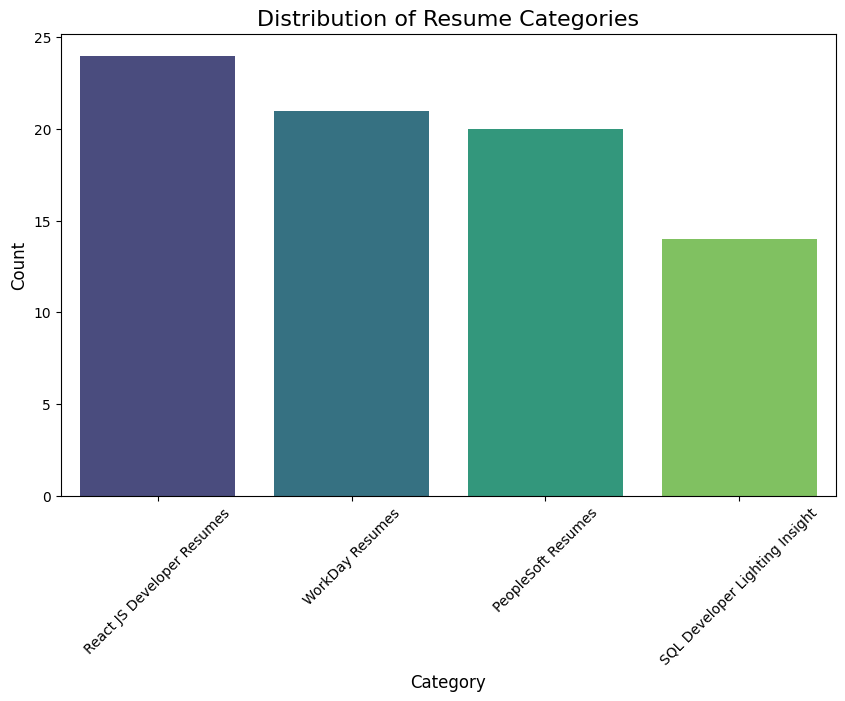

React JS Developer Resumes        24
WorkDay Resumes                   21
PeopleSoft Resumes                20
SQL Developer Lighting Insight    14
Name: Category, dtype: int64

In [29]:
# Constructing Bar Chart for Category Distribution
import matplotlib.pyplot as plt
import seaborn as sns


category_counts = resume_data['Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x = category_counts.index, y = category_counts.values, palette = "viridis")
plt.title("Distribution of Resume Categories", fontsize = 16)
plt.xlabel("Category", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

category_counts

# 2. Education Levels

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\3780011081.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = education_counts.index, y = education_counts.values, palette = "rocket")


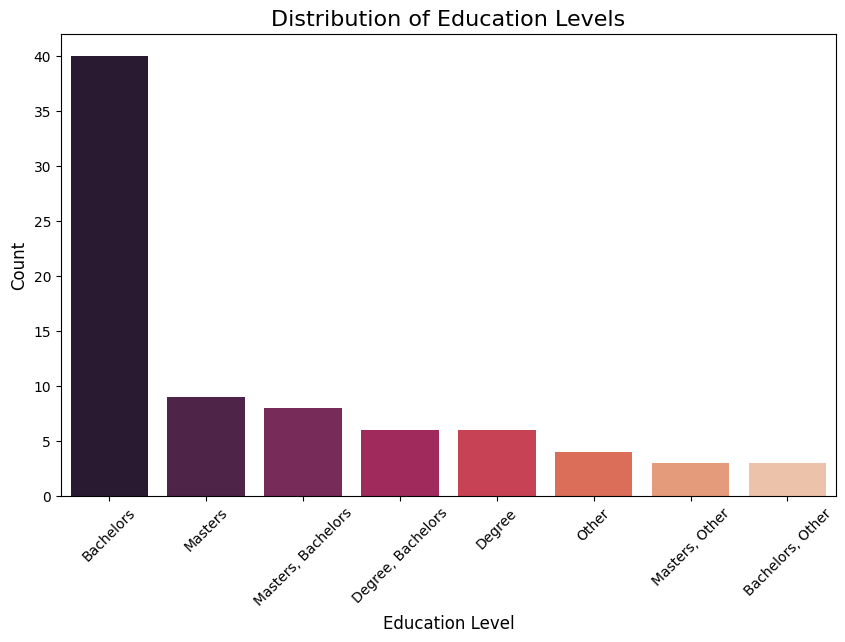

Bachelors             40
Masters                9
Masters, Bachelors     8
Degree, Bachelors      6
Degree                 6
Other                  4
Masters, Other         3
Bachelors, Other       3
Name: Education, dtype: int64

In [31]:
education_counts = resume_data['Education'].value_counts()

plt.figure(figsize = (10, 6))
sns.barplot(x = education_counts.index, y = education_counts.values, palette = "rocket")
plt.title("Distribution of Education Levels", fontsize = 16)
plt.xlabel("Education Level", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

education_counts

# 3. Distribution of Years of Experience

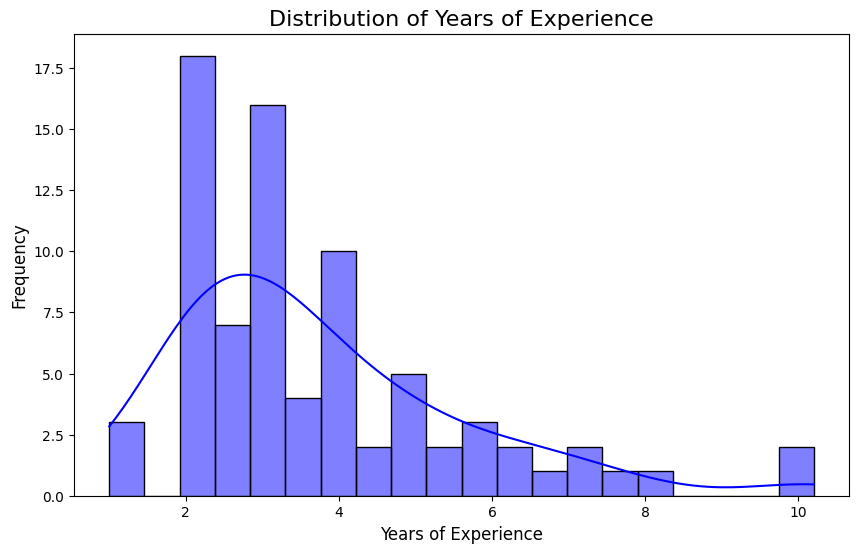

In [33]:
# Constructing Histogram for Years of Experience

plt.figure(figsize = (10, 6))
sns.histplot(resume_data['Years_of_Experience'], bins = 20, kde = True, color = 'blue')
plt.title("Distribution of Years of Experience", fontsize = 16)
plt.xlabel("Years of Experience", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

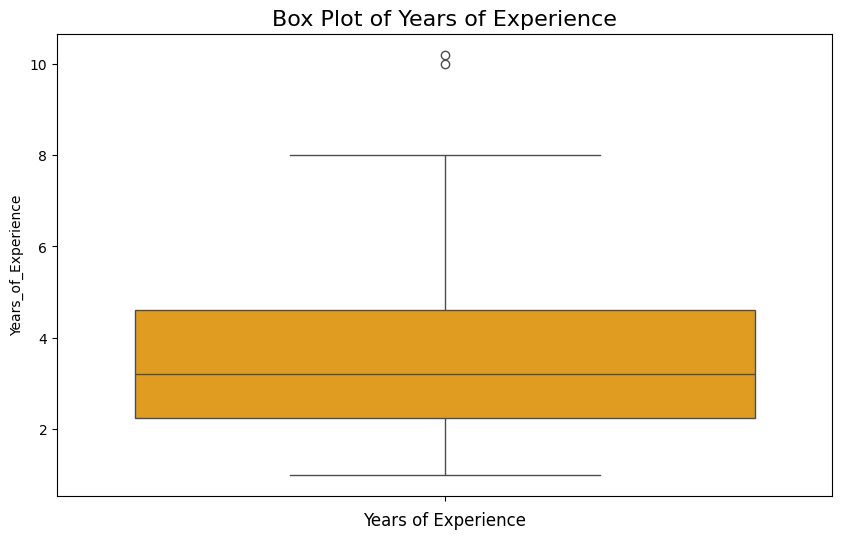

In [35]:
# Constructing Boxplot for Years of Experience

plt.figure(figsize = (10, 6))
sns.boxplot(resume_data['Years_of_Experience'], color = 'orange')
plt.title("Box Plot of Years of Experience", fontsize = 16)
plt.xlabel("Years of Experience", fontsize = 12)
plt.show()

# 4. Analyzing Skills

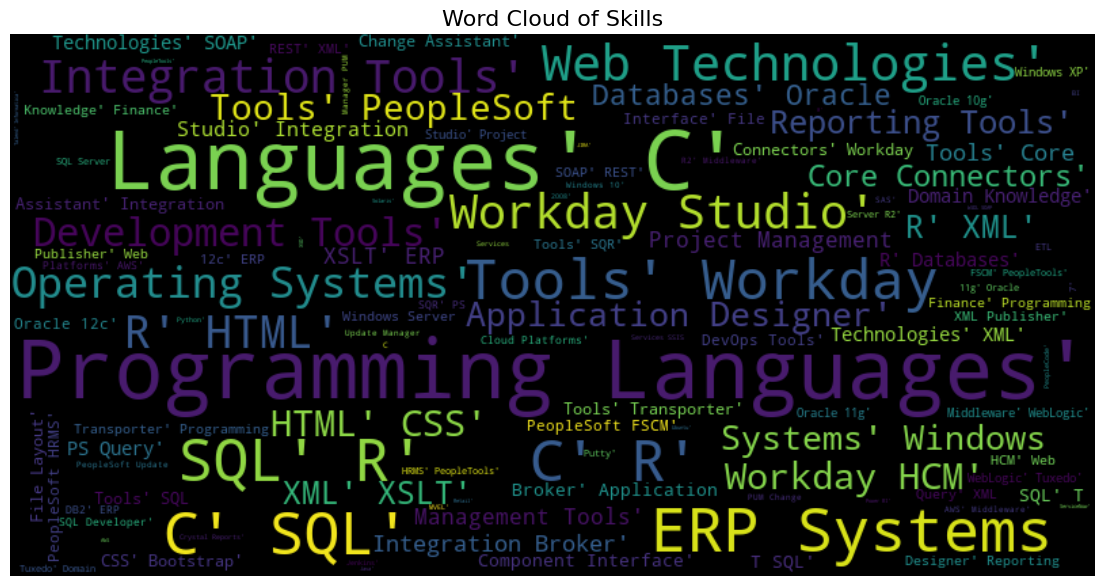

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

skills_text = ' '.join(resume_data['Skills'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'black', colormap = 'viridis').generate(skills_text)

plt.figure(figsize = (14, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Word Cloud of Skills", fontsize = 16)
plt.show()

# 5. Distribution of Professional Experience

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\1325364938.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = experience_counts.values, y = experience_counts.index, palette = "mako")


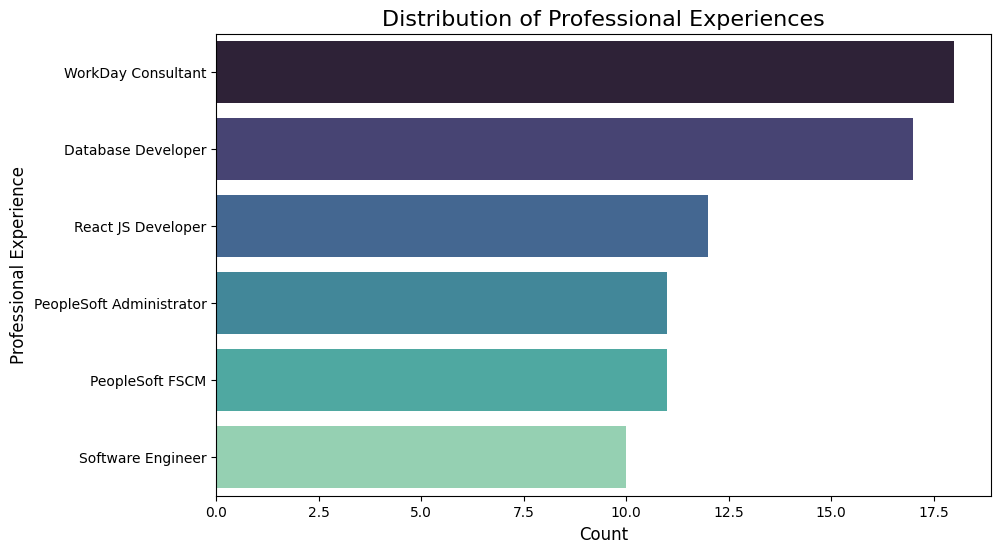

WorkDay Consultant          18
Database Developer          17
React JS Developer          12
PeopleSoft Administrator    11
PeopleSoft FSCM             11
Software Engineer           10
Name: Professional_Expereince, dtype: int64

In [43]:
experience_counts = resume_data['Professional_Expereince'].value_counts()

plt.figure(figsize = (10, 6))
sns.barplot(x = experience_counts.values, y = experience_counts.index, palette = "mako")
plt.title("Distribution of Professional Experiences", fontsize = 16)
plt.xlabel("Count", fontsize = 12)
plt.ylabel("Professional Experience", fontsize = 12)
plt.show()

experience_counts

# 6. Top 10 Skills

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\443799006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(counts), y = list(skills), palette = "coolwarm")


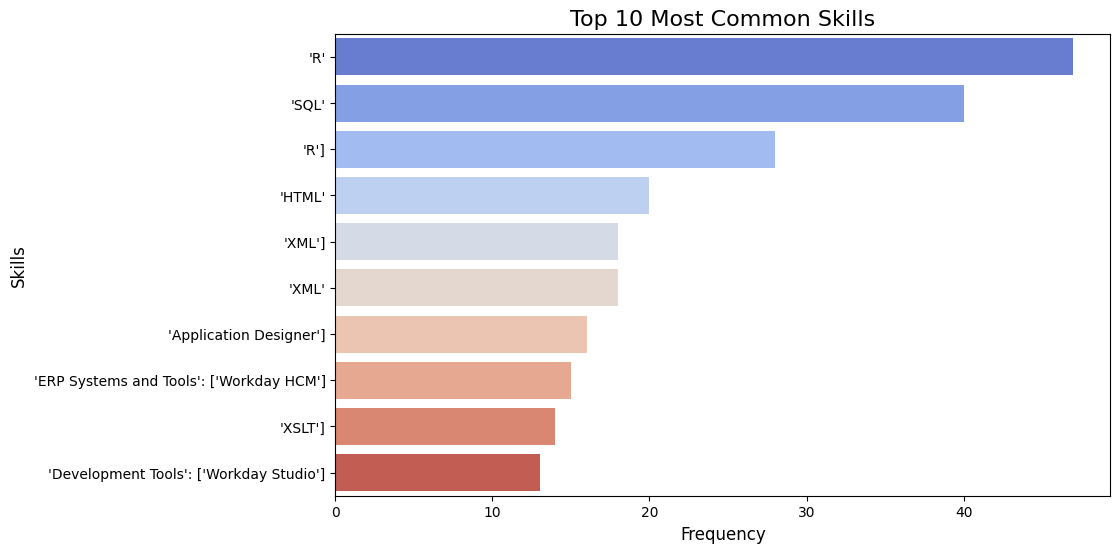

In [45]:
from collections import Counter

skills_list = ' '.join(resume_data['Skills']).split(', ')
skills_count = Counter(skills_list)

top_skills = skills_count.most_common(10)
skills, counts = zip(*top_skills)

plt.figure(figsize = (10, 6))
sns.barplot(x = list(counts), y = list(skills), palette = "coolwarm")
plt.title("Top 10 Most Common Skills", fontsize = 16)
plt.xlabel("Frequency", fontsize = 12)
plt.ylabel("Skills", fontsize = 12)
plt.show()

# 7 . Top 10 most common companies employees worked

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\1902983540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(counts), y = list(companies), palette = "cubehelix")


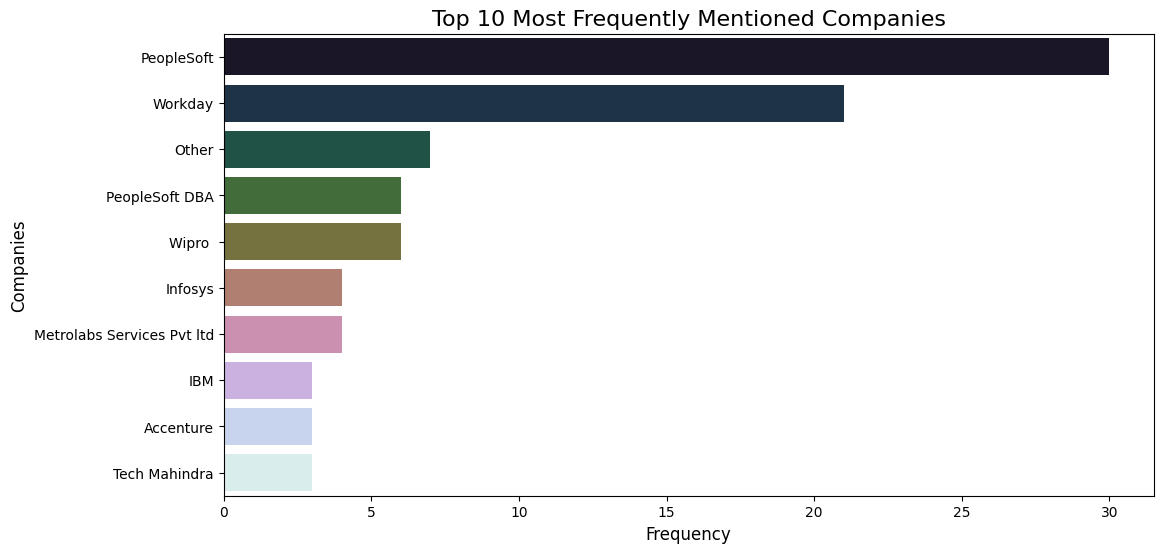

In [47]:
companies_list = ', '.join(resume_data['Companies_Worked']).split(', ')
companies_count = Counter(companies_list)

top_companies = companies_count.most_common(10)
companies, counts = zip(*top_companies)

plt.figure(figsize = (12, 6))
sns.barplot(x = list(counts), y = list(companies), palette = "cubehelix")
plt.title("Top 10 Most Frequently Mentioned Companies", fontsize = 16)
plt.xlabel("Frequency", fontsize = 12)
plt.ylabel("Companies", fontsize = 12)
plt.show()

# 8. Relationship Between Years of Experience and Categories

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\3009708223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = 'Category', y = 'Years_of_Experience', data = resume_data, jitter = True, palette = "Set2")


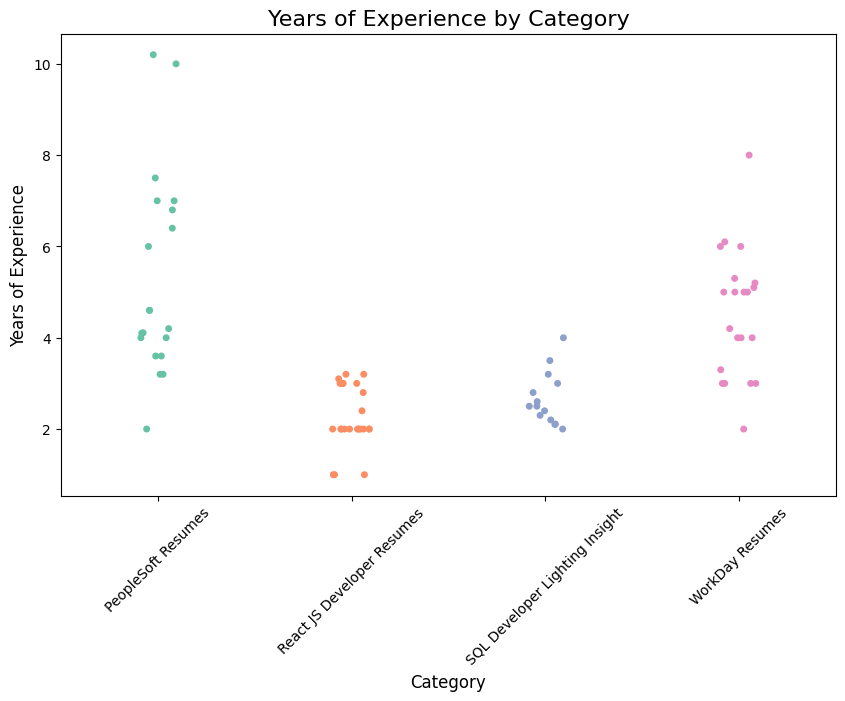

In [49]:
plt.figure(figsize = (10, 6))
sns.stripplot(x = 'Category', y = 'Years_of_Experience', data = resume_data, jitter = True, palette = "Set2")
plt.title("Years of Experience by Category", fontsize = 16)
plt.xlabel("Category", fontsize = 12)
plt.ylabel("Years of Experience", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

# 9. Average Experience by Education Level

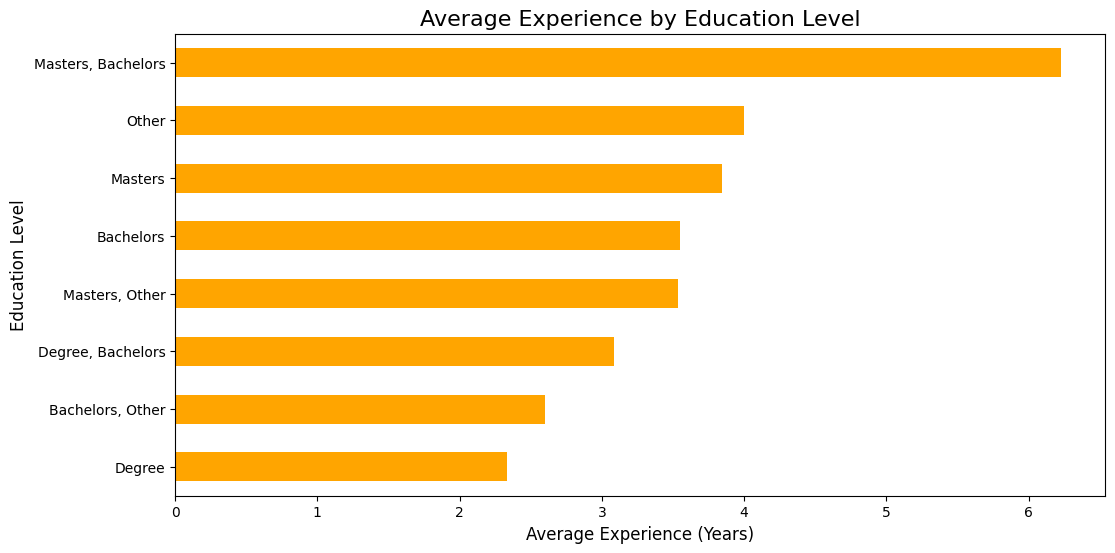

In [51]:
edu_exp = resume_data.groupby('Education')['Years_of_Experience'].mean().sort_values()
plt.figure(figsize = (12, 6))
edu_exp.plot(kind = 'barh', color = 'orange')
plt.title('Average Experience by Education Level', fontsize = 16)
plt.xlabel('Average Experience (Years)', fontsize = 12)
plt.ylabel('Education Level', fontsize = 12)
plt.show()

# 10. Average Experience by Professional Experience

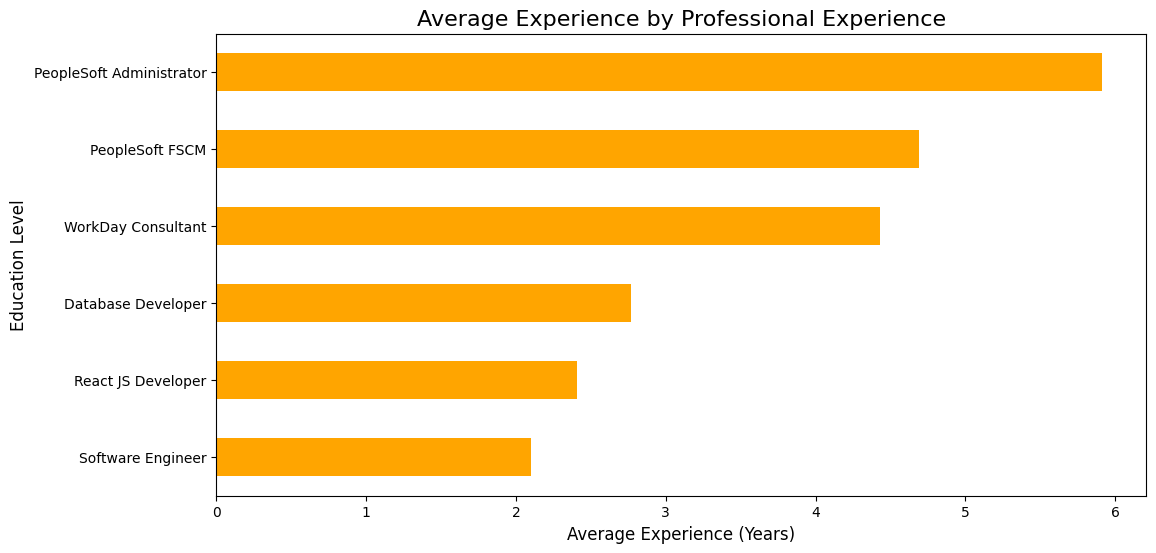

In [53]:
edu_exp = resume_data.groupby('Professional_Expereince')['Years_of_Experience'].mean().sort_values()
plt.figure(figsize = (12, 6))
edu_exp.plot(kind = 'barh', color = 'orange')
plt.title('Average Experience by Professional Experience', fontsize = 16)
plt.xlabel('Average Experience (Years)', fontsize = 12)
plt.ylabel('Education Level', fontsize = 12)
plt.show()

# 11. Distribution OF Experience Across Education Levels

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\3373697395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Education', y = 'Years_of_Experience', data = resume_data, palette = 'coolwarm')


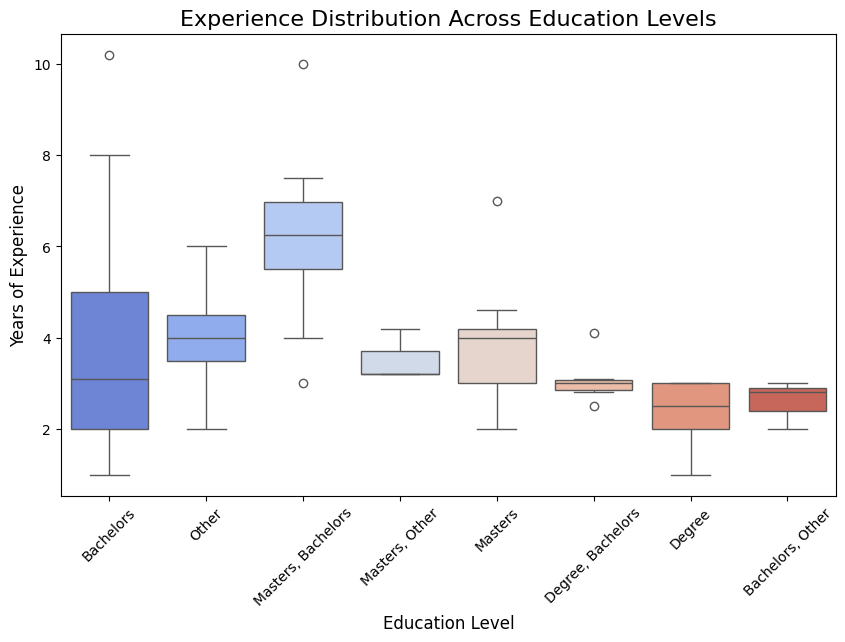

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Education', y = 'Years_of_Experience', data = resume_data, palette = 'coolwarm')
plt.title('Experience Distribution Across Education Levels', fontsize=16)
plt.xlabel('Education Level', fontsize = 12)
plt.ylabel('Years of Experience', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

# 12. Top 20 Common Skills in Professional Experience

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\303670996.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Skill', data=skill_df.head(20), palette="viridis")


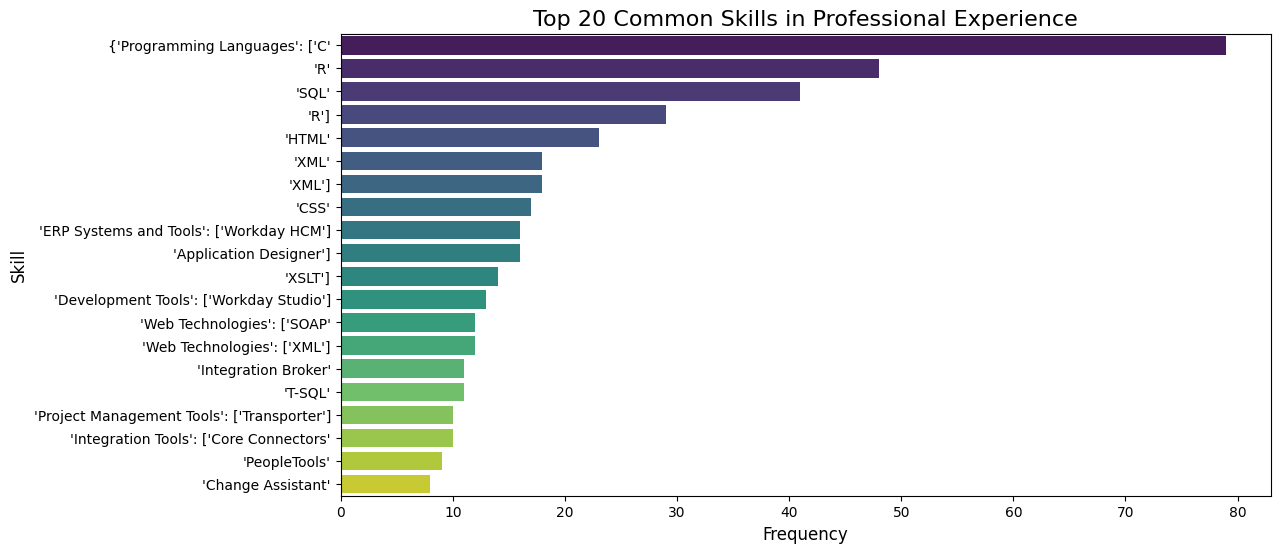

In [57]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the skills into a single list
all_skills = resume_data['Skills'].str.split(', ').explode()

# Count the occurrences of each skill
skill_counts = Counter(all_skills)

# Convert to a DataFrame for visualization
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot the top 20 most common skills
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Skill', data=skill_df.head(20), palette="viridis")
plt.title("Top 20 Common Skills in Professional Experience", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Skill", fontsize=12)
plt.show()

# 13. Distribution of Skills in Professional Experience

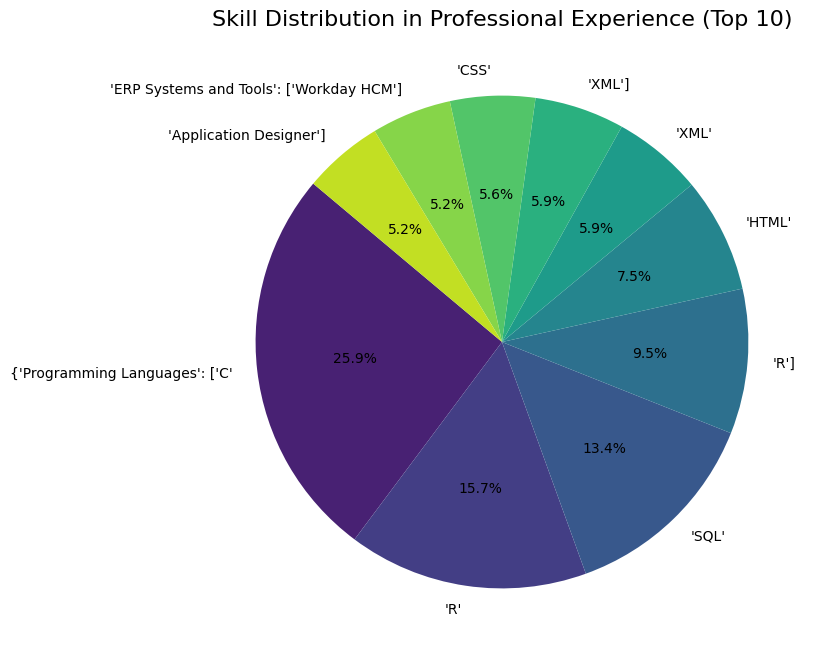

In [59]:
top_skills = skill_df.head(10)

plt.figure(figsize = (8, 8))
plt.pie(top_skills['Frequency'], labels = top_skills['Skill'], autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("viridis", len(top_skills)))
plt.title("Skill Distribution in Professional Experience (Top 10)", fontsize = 16)
plt.show()

# Heatmap of Top 20 Skills by Frequency

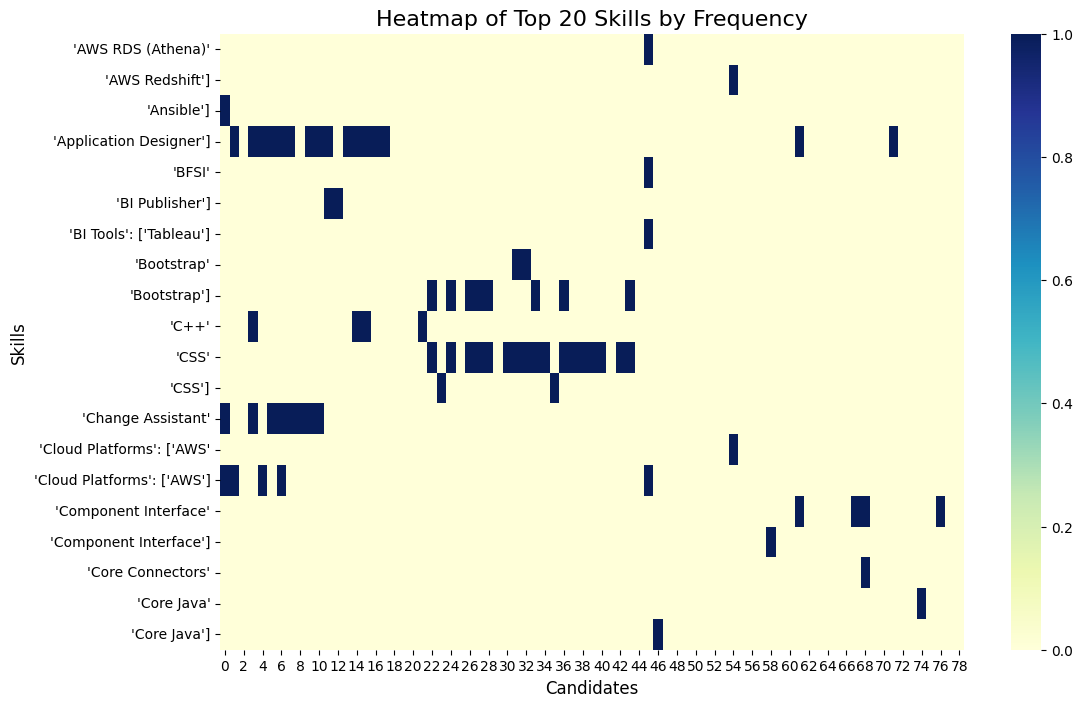

In [61]:
skill_matrix = resume_data['Skills'].str.get_dummies(sep=', ')

skill_frequency = skill_matrix.sum().sort_values(ascending=False)

heatmap_data = pd.DataFrame(skill_frequency).reset_index()
heatmap_data.columns = ['Skill', 'Frequency']

plt.figure(figsize = (12, 8))
sns.heatmap(skill_matrix.T.iloc[:20], cmap = "YlGnBu", cbar = True)
plt.title("Heatmap of Top 20 Skills by Frequency", fontsize = 16)
plt.xlabel("Candidates", fontsize = 12)
plt.ylabel("Skills", fontsize = 12)
plt.show()

# One-Hot Encoding (Categorical Data)

In [63]:
# applying One-Hot Encoding for categorical columns
encoded_data = pd.get_dummies(resume_data, columns=['Category', 'Education', 'Professional_Expereince'])
encoded_data.head()

,Employee_Name,Skills,Companies_Worked,Years_of_Experience,Category_PeopleSoft Resumes,Category_React JS Developer Resumes,Category_SQL Developer Lighting Insight,Category_WorkDay Resumes,Education_Bachelors,"Education_Bachelors, Other",...,Education_Masters,"Education_Masters, Bachelors","Education_Masters, Other",Education_Other,Professional_Expereince_Database Developer,Professional_Expereince_PeopleSoft Administrator,Professional_Expereince_PeopleSoft FSCM,Professional_Expereince_React JS Developer,Professional_Expereince_Software Engineer,Professional_Expereince_WorkDay Consultant
0,Anubhavsingh,"{'Programming Languages': ['C', 'R'], 'Databas...","HCL, PeopleSoft, IBM",2.00,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,G Ananda Rayudu,"{'Programming Languages': ['C', 'R'], 'Databas...","IDC Technologies Sol. (I) Pvt. Ltd., Texas Dep...",7.00,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,Gangareddy,"{'Programming Languages': ['C', 'SQL', 'R'], '...",PeopleSoft,4.00,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,Murali,"{'Programming Languages': ['C', 'C++', 'SQL', ...","L N T INFOTECH, Regency Technologies, DXC Tech...",6.00,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,Priyanka Ramadoss,"{'Programming Languages': ['C', 'SQL', 'R'], '...","Accenture Solutions Pvt Ltd., Accenture, Peopl...",4.11,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# 1. Heatmap of Correlations

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\636735293.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = encoded_data.corr()


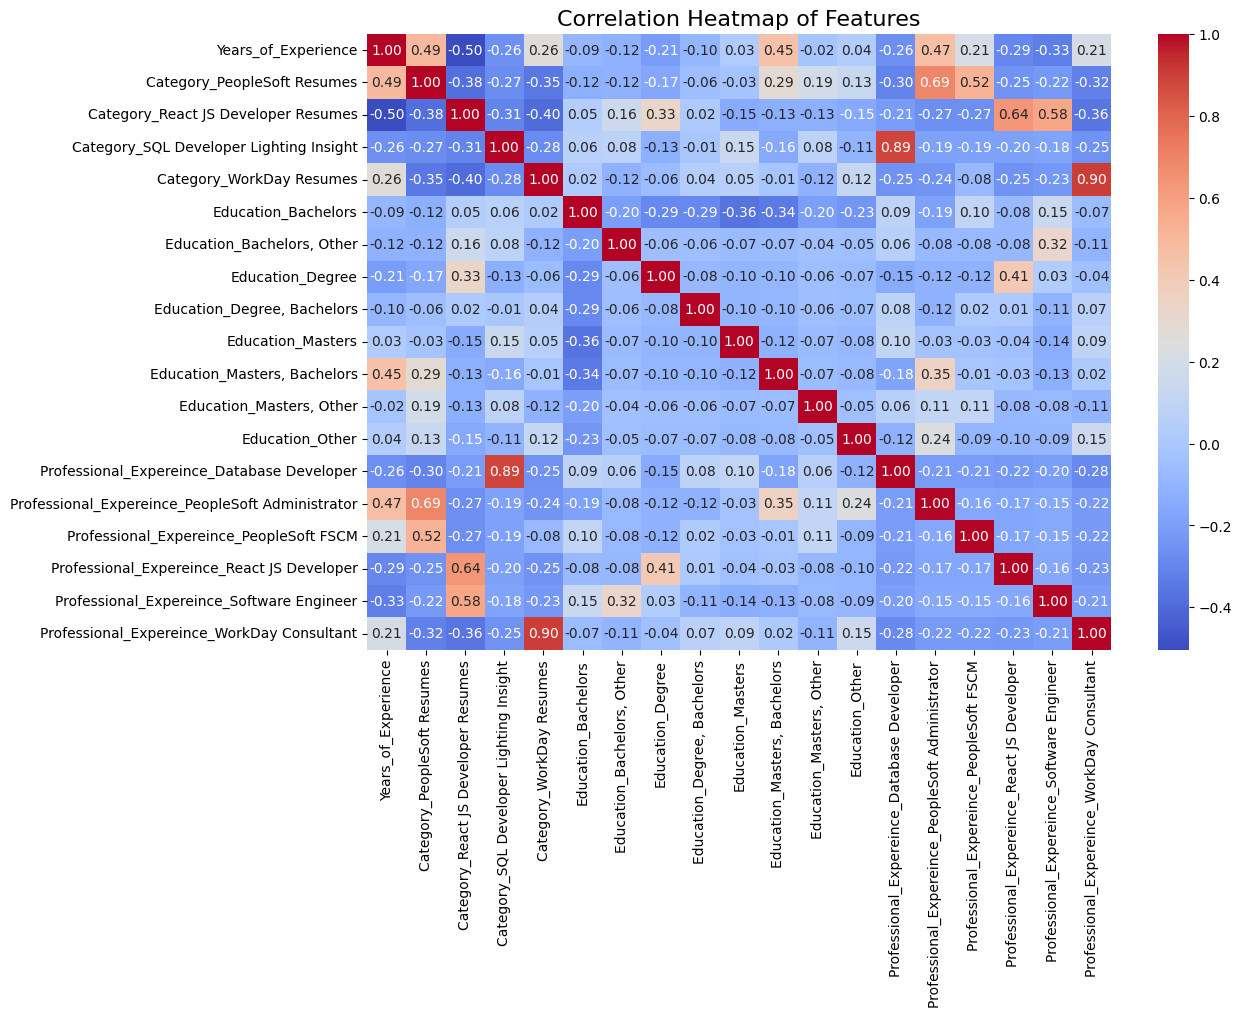

In [65]:
correlation_matrix = encoded_data.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap of Features", fontsize = 16)
plt.show()

# 2. Bar Plot for Encoded Categories

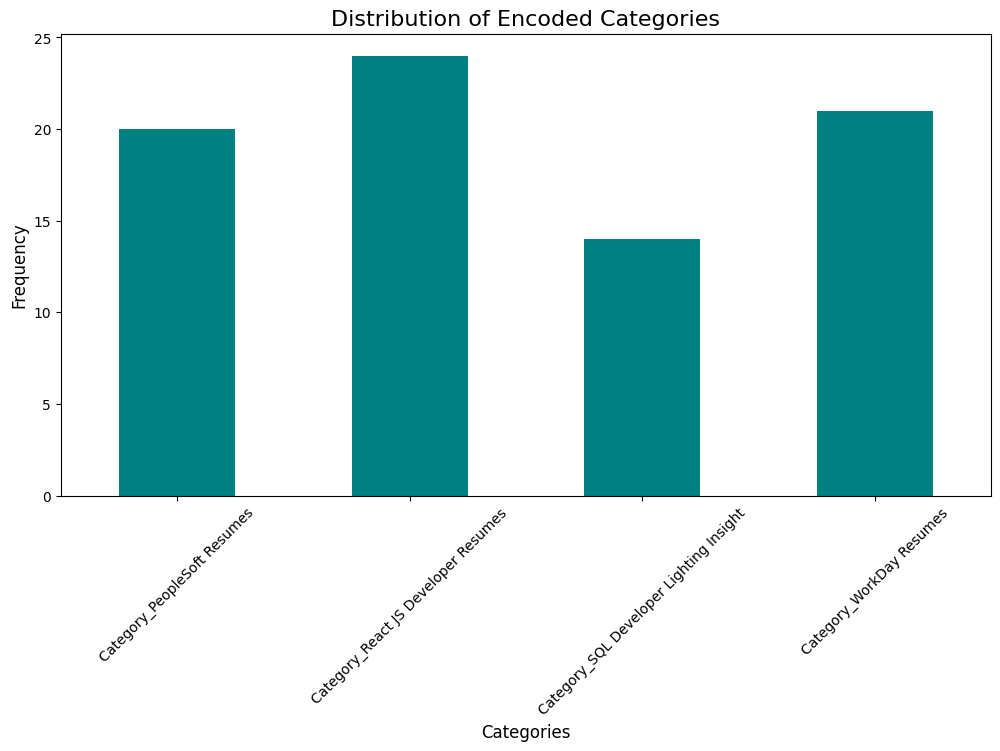

In [67]:
category_counts = encoded_data.filter(like = 'Category_').sum()

plt.figure(figsize = (12, 6))
category_counts.plot(kind = 'bar', color = 'teal')
plt.title("Distribution of Encoded Categories", fontsize = 16)
plt.xlabel("Categories", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

# 3. Comparison of One-Hot Encoded Features

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\842857964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = encoded_data[encoded_feature], y = encoded_data['Years_of_Experience'], palette = 'pastel')


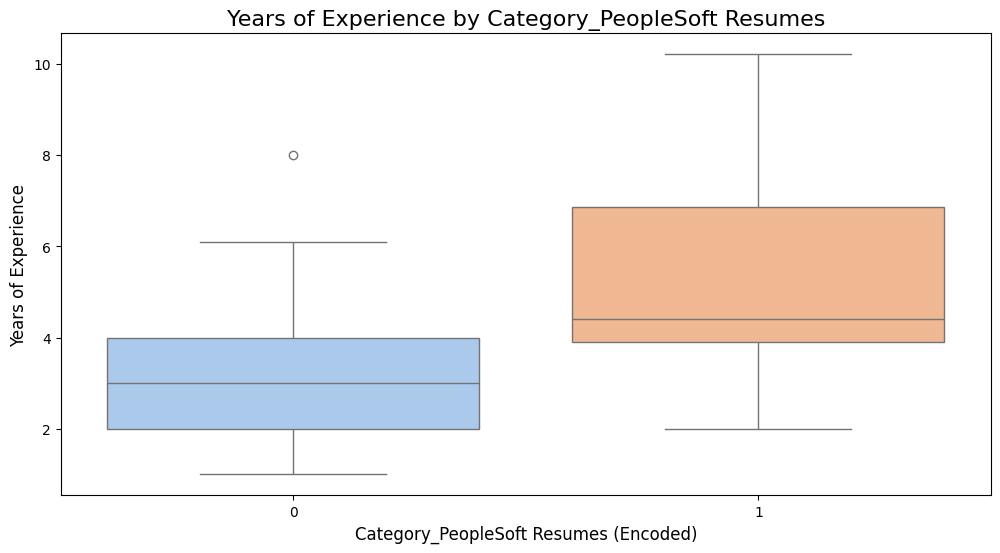

In [69]:
encoded_feature = 'Category_PeopleSoft Resumes' 

plt.figure(figsize = (12, 6))
sns.boxplot(x = encoded_data[encoded_feature], y = encoded_data['Years_of_Experience'], palette = 'pastel')
plt.title(f"Years of Experience by {encoded_feature}", fontsize = 16)
plt.xlabel(f"{encoded_feature} (Encoded)", fontsize = 12)
plt.ylabel("Years of Experience", fontsize = 12)
plt.show()

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\2009026409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = encoded_data[encoded_feature], y = encoded_data['Years_of_Experience'], palette = 'pastel')


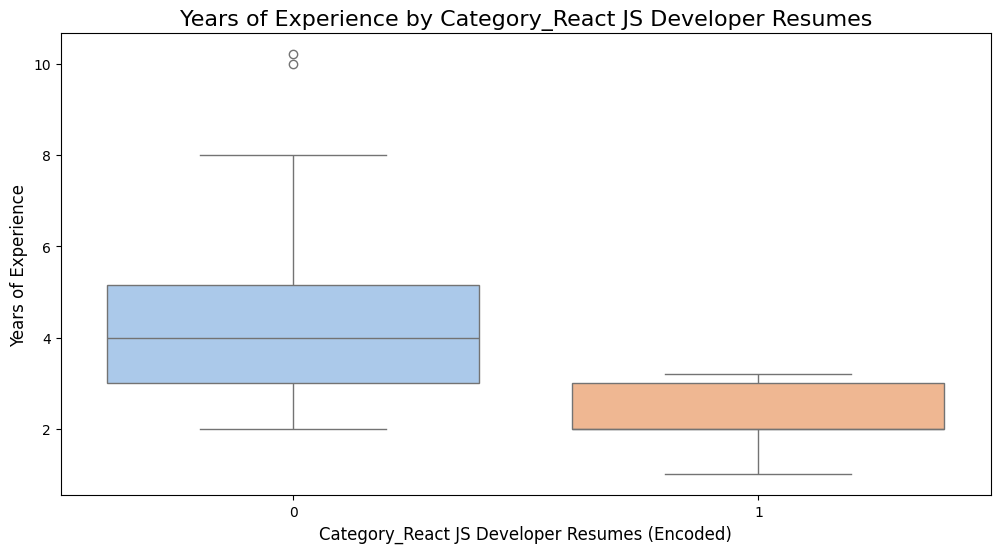

In [71]:
encoded_feature = 'Category_React JS Developer Resumes' 

plt.figure(figsize = (12, 6))
sns.boxplot(x = encoded_data[encoded_feature], y = encoded_data['Years_of_Experience'], palette = 'pastel')
plt.title(f"Years of Experience by {encoded_feature}", fontsize = 16)
plt.xlabel(f"{encoded_feature} (Encoded)", fontsize = 12)
plt.ylabel("Years of Experience", fontsize = 12)
plt.show()

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\1937595132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = encoded_data[encoded_feature], y = encoded_data['Years_of_Experience'], palette = 'pastel')


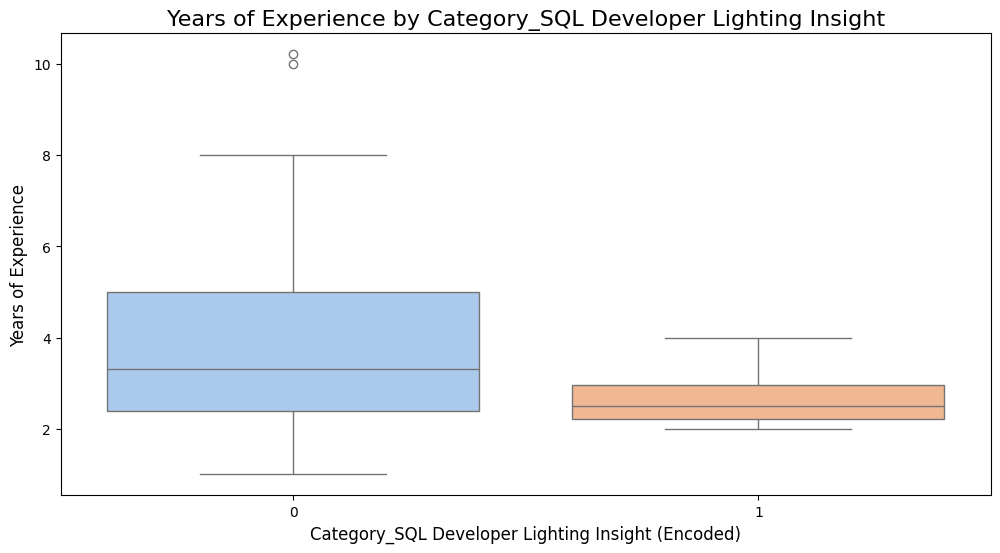

In [73]:
encoded_feature = 'Category_SQL Developer Lighting Insight' 

plt.figure(figsize = (12, 6))
sns.boxplot(x = encoded_data[encoded_feature], y = encoded_data['Years_of_Experience'], palette = 'pastel')
plt.title(f"Years of Experience by {encoded_feature}", fontsize = 16)
plt.xlabel(f"{encoded_feature} (Encoded)", fontsize = 12)
plt.ylabel("Years of Experience", fontsize = 12)
plt.show()

C:\Users\mulag\AppData\Local\Temp\ipykernel_44840\2403981802.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = encoded_data[encoded_feature], y = encoded_data['Years_of_Experience'], palette = 'pastel')


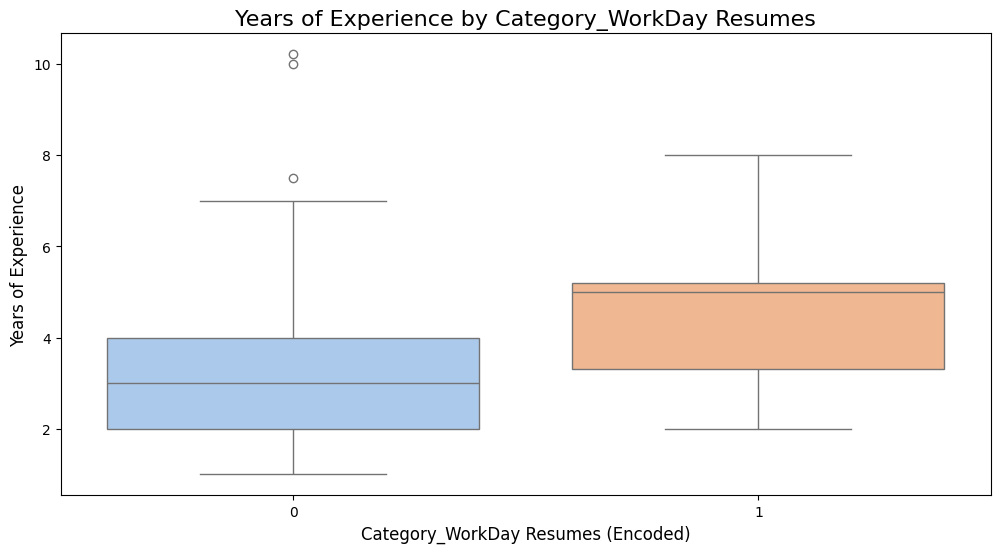

In [75]:
encoded_feature = 'Category_WorkDay Resumes' 

plt.figure(figsize = (12, 6))
sns.boxplot(x = encoded_data[encoded_feature], y = encoded_data['Years_of_Experience'], palette = 'pastel')
plt.title(f"Years of Experience by {encoded_feature}", fontsize = 16)
plt.xlabel(f"{encoded_feature} (Encoded)", fontsize = 12)
plt.ylabel("Years of Experience", fontsize = 12)
plt.show()

# 4. Stacked Bar Plot


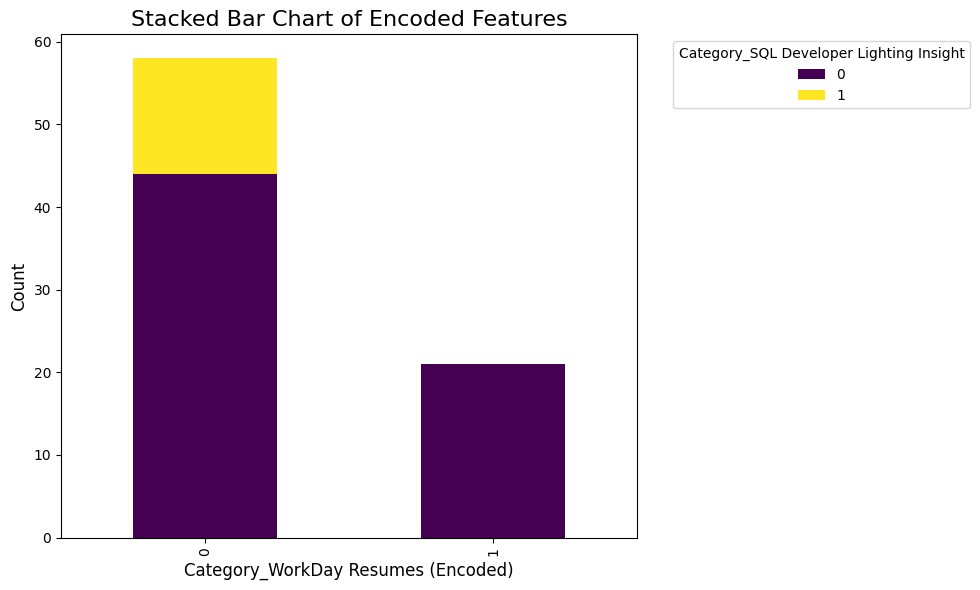

In [77]:
feature1 = 'Category_WorkDay Resumes'  
feature2 = 'Category_SQL Developer Lighting Insight'      
grouped_data = encoded_data.groupby([feature1, feature2]).size().unstack()

grouped_data.plot(kind = 'bar', stacked = True, figsize = (10, 6), colormap = 'viridis')
plt.title("Stacked Bar Chart of Encoded Features", fontsize = 16)
plt.xlabel(f"{feature1} (Encoded)", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.legend(title = feature2, bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()